Given
\begin{equation}
f(x)=−2x^6−1.5x^4+10x+2
\end{equation}
Use bisection to determine the maximum of this function. Employ initial guesses of \begin{equation} xl=0 \end{equation} and \begin{equation} xu=1 \end{equation} and perform iterations until the approximate relative error falls below 5%.

In [198]:
function f(x)
    -2*x^6-1.5*x^4+10*x+2
end;

We will write the bisection method as a function in Julia (taken from submodule "Bracketing Methods" in Module 2):

In [200]:
function bisect(xl,xu,es,imax)   #use the bisection function to determine the existence of roots in an interval as well as the value of the root
    iter = 0
    fl = f(xl)
    xr = xu
    ea = es + 1
    
    if f(xl)*f(xu) < 0                     #if the statement is false, there is no root in the interval
        while ea > es && iter < imax       #conditions for the loop to continue
            xr_old = xr                   
            xr = (xl + xu)/2
            fr = f(xr)
            iter += 1
        
            if xr != 0
            ea = abs((xr - xr_old)/xr)*100
            end
        
            test = fl*fr
        
            if test < 0
            xu = xr
            elseif test > 0
                xl = xr
                fl = fr
            else
                ea = 0
            end
        end  
        return xr,iter,ea
    else
        print("No roots between interval")
    end
end

bisect (generic function with 1 method)

In [201]:
xl = 0
xu = 1
es = 5
imax = 1000

bisect(xl,xu,es,imax)

No roots between interval

Since there is no roots in the initial guess of \begin{equation} xl=0 \end{equation} and \begin{equation} xu=1 \end{equation} we will proceed with Graphical Method to determine the interval that includes \begin{equation} f(x)=0 \end{equation}

In [202]:
using Plots

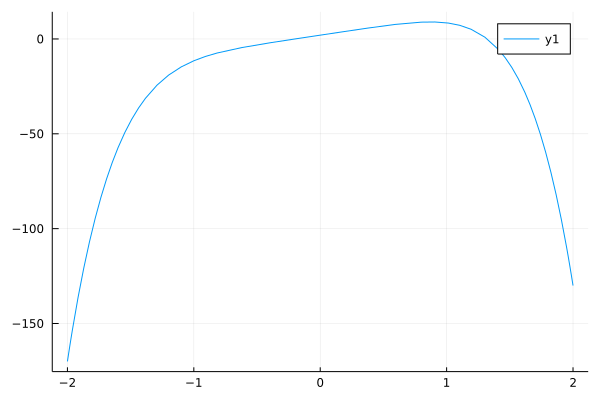

In [203]:
f(x)
plot(f, -2, 2)

Our new interval for solving the root is now [1, 2] .

In [204]:
xl = 1
xu = 2
es = 5
imax = 1000

bisect(xl,xu,es,imax)

(1.3125, 4, 4.761904761904762)

After 4 iterations and approximate relative error (es) falling below 5% (4.76%), the root is approximately \begin{equation} x=1.3125 \end{equation} 

To determine the existence of a maximum/minimum, we need to get the derivative of f(x).

In [205]:
using Calculus

In [206]:
differentiate("-2*x^6-1.5*x^4+10*x+2", :x)

:(((0 * x ^ 6 + -2 * (6 * 1 * x ^ (6 - 1))) - (0 * x ^ 4 + 1.5 * (4 * 1 * x ^ (4 - 1)))) + (0 * x + 10 * 1))

In [207]:
function fprime(x)
    (((0 * x ^ 6 + -2 * (6 * 1 * x ^ (6 - 1))) - (0 * x ^ 4 + 1.5 * (4 * 1 * x ^ (4 - 1)))) + (0 * x + 10 * 1))
end;

We will write the first derivative test as a function in Julia to determine if there is a change in the signs of the values of f'(x) at [0,1] (the initial guess interval).

In [208]:
function first_derivative_test(xl,xu)
    if fprime(xl)*fprime(xu) < 0
        print("There is a maximum/minimum in the interval.")
    else
        print("There is no maximum/minimum in the interval.")
    end
end

first_derivative_test (generic function with 1 method)

In [209]:
xl = 0
xu = 1

first_derivative_test(xl,xu)

There is a maximum/minimum in the interval.

Since the sign of f'(x) at [0,1] changed, we can assume that there is a maximum/minimum at said interval since f'(x) is the slope of the line tangent to f(x) at x.

To get the maximum/minimum, we will use the same concept of bisection method to get the critical points by solving for the root of f'(x) at [0,1].

In [210]:
function get_max(xl,xu,es,imax)
    iter = 0
    fl = fprime(xl)
    xr = xu
    ea = es + 1
    
    if fprime(xl)*fprime(xu) < 0
        while ea > es && iter < imax
            xr_old = xr
            xr = (xl + xu)/2
            fr = fprime(xr)
            iter += 1
        
            if xr != 0
            ea = abs((xr - xr_old)/xr)*100
            end
        
            test = fl*fr
        
            if test < 0
            xu = xr
            elseif test > 0
                xl = xr
                fl = fr
            else
                ea = 0
            end
        end  
        print("(", xr, ", ", f(xr), ")" )
    end
end

get_max (generic function with 1 method)

In [212]:
xl = 0
xu = 1
es = 0.05                               #lower approximate relative error to get more accurate value
imax = 1000

get_max(xl,xu,es,imax)

(0.871337890625, 8.973449034416316)

The maximum of
\begin{equation}
f(x)=−2x^6−1.5x^4+10x+2
\end{equation}
is at (0.8713, 8.9734). We used a lower approximate relative error to get a more accurate value.